In [12]:
import numpy as np
import pandas as pd

import folium
from folium.plugins import TimestampedGeoJson
from folium.plugins import HeatMap
import branca.colormap as cm

%matplotlib inline
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import colors as cl
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("japan_average_temp_1976-2020.csv", index_col=[0,1])

In [4]:
df.head()

1976-1-15  1976-2-15  1976-3-15  1976-4-15  1976-5-15  1976-6-15  \
area point                                                                     
宗谷   中頓別          NaN        NaN        NaN        NaN        NaN        NaN   
     北見枝幸        -5.0       -4.0       -2.0        3.0       10.0       11.0   
     声問           NaN        NaN        NaN        NaN        NaN        NaN   
     宗谷岬          NaN        NaN        NaN        NaN        NaN        NaN   
     本泊           NaN        NaN        NaN        NaN        NaN        NaN   

            1976-7-15  1976-8-15  1976-9-15  1976-10-15  ...  2020-3-15  \
area point                                               ...              
宗谷   中頓別          NaN        NaN        NaN         NaN  ...       -0.0   
     北見枝幸        18.0       17.0       14.0         9.0  ...        0.0   
     声問           NaN        NaN        NaN         NaN  ...        0.0   
     宗谷岬          NaN        NaN        NaN         NaN  ...        0.0   
     本泊           NaN        NaN        NaN         NaN  ...        1.0   

            2020-4-15  2020-5-15      katakana  latitude degree  \
area point                                                        
宗谷   中頓別          3.0        NaN  Nakatonbetsu             44.0   
     北見枝幸         3.0       10.0  Kitamiesashi             44.0   
     声問           3.0        NaN        Koetoi             45.0   
     宗谷岬          3.0        NaN   Souyamisaki             45.0   
     本泊           4.0        NaN    Motodomari             45.0   

            latitude minute  longitude degree  longitude minute   latitude  \
area point                                                                   
宗谷   中頓別               57.9             142.0              16.8  44.950250   
     北見枝幸              56.4             142.0              35.1  44.933444   
     声問                24.2             141.0              48.1  45.400056   
     宗谷岬               31.2             141.0              56.1  45.516722   
     本泊                14.5             141.0              11.2  45.233472   

             longitude  
area point              
宗谷   中頓別    142.266889  
     北見枝幸   142.583361  
     声問     141.800028  
     宗谷岬    141.933361  
     本泊     141.183389  

[5 rows x 540 columns]

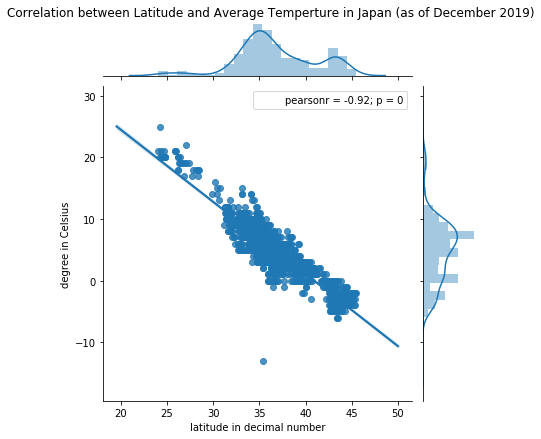

In [6]:
plot = sns.jointplot(x="latitude", y="2019-12-15", data=df, kind="reg")
plot.annotate(stats.pearsonr)

plt.suptitle("Correlation between Latitude and Average Temperture in Japan (as of December 2019)", x=0.5, y=1.01)
plt.xlabel("latitude in decimal number")
plt.ylabel("degree in Celsius")

plt.savefig("Correlation between Latitude and Average Temperture in Japan (as of December 2019)")

In [27]:
norm = cl.Normalize(vmin= -10, vmax= 30)
cmap = plt.get_cmap('jet')

points   = []
features = []

for y in np.arange(2019,2020):
    year = str(y)
    for m in np.arange(1,13):
        if m >= 10:
            month = str(m)
        else:
            month = "0" + str(m)
        
        for lat, lon, name, temp in zip(df["latitude"],df["longitude"],df["katakana"],df[year + "-" + str(m) + "-15"]):
            
            if np.isnan(temp):
                continue
            else:
                
                c = cl.to_hex( cmap(norm(temp)) )

                features.append({'type': 'Feature',
                                 
                                 'geometry': {'type': 'Point',
                                              'coordinates': [lon,lat]},
                                 
                                 'properties': {'time': year + "-" + month + "-15",
                                                'popup':"<h6 style=\'color:black;\'>" + name + "<h6>" + "<h6 style=\'color:" + str(c) + ";\'>" + str(temp) + "℃<h6>",
                                                'icon': 'circle',
                                                'iconstyle': {'color': c,
                                                'fill': True,
                                                'radius': 5},
                                                'style': {'fillOpacity': 1,
                                                          'weight': 1}
                                               }
                                }
                               )

m = folium.Map(location=[35.681236,139.767125],zoom_start=5)

TimestampedGeoJson(
    {
        'type': 'FeatureCollection',
        'features': features
    },
    period='P1M',
    add_last_point=False,
    auto_play=False,
    loop=False,
    max_speed=1,
    loop_button=True,
    date_options='YYYY/MM',
    time_slider_drag_update=False,
).add_to(m)

m.save('japan_ave_temp2019.html')
m